In [ ]:
#if using google collab, mounting the drive is convenient
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data_path = "/content/drive/MyDrive/PPTP/simple_mlp/"

#loading the features extracted from the preprocessor
features = np.loadtxt(data_path + "normalized_features.txt")
labels = np.loadtxt(data_path + "extracted_labels_.txt")

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#this part is for hyperparameter tuning\

# Hyperparameter values to try
hidden_layer_sizes_list = [(14,), (20,), (14, 14), (20, 20)]
alpha_list = [0.001, 0.01, 0.1]
learning_rate_init_list = [0.0001, 0.001, 0.01]

#we want to save only the one that produces the best accuracy in the test set
best_accuracy = 0.0
best_parameters = {}

for hidden_layer_sizes in hidden_layer_sizes_list:
    for alpha in alpha_list:
        for learning_rate_init in learning_rate_init_list:
            # Create and train the MLP
            mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, alpha=alpha, learning_rate_init=learning_rate_init,
                                validation_fraction=0.2, n_iter_no_change=20, max_iter=10000, random_state=42)
            mlp.fit(X_train, y_train)
            
            # Calculate the accuracy on the validation set
            predictions = mlp.predict(X_val)
            accuracy = accuracy_score(y_val, predictions)
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_parameters = {
                    'hidden_layer_sizes': hidden_layer_sizes,
                    'alpha': alpha,
                    'learning_rate_init': learning_rate_init
                }

print("Best Parameters:", best_parameters)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'hidden_layer_sizes': (20, 20), 'alpha': 0.001, 'learning_rate_init': 0.001}
Best Accuracy: 0.8940854611776967


Note that despite trying various hyperparameters, the improvements between different settings are marginal

Epoch 1000/10000, Loss: 0.24902637465386554, Accuracy: 0.8944241792600313
Epoch 2000/10000, Loss: 0.23732118616191156, Accuracy: 0.8997394476289734
Epoch 3000/10000, Loss: 0.23092001604525034, Accuracy: 0.9010943199583116
Epoch 4000/10000, Loss: 0.22735059486444992, Accuracy: 0.9023449713392392
Epoch 5000/10000, Loss: 0.22507341608447196, Accuracy: 0.9026576341844711
Epoch 6000/10000, Loss: 0.22378283559449363, Accuracy: 0.9033871808233455
Epoch 7000/10000, Loss: 0.22268777586109098, Accuracy: 0.9041167274622199
Epoch 8000/10000, Loss: 0.22209936002864136, Accuracy: 0.9022407503908285
Epoch 9000/10000, Loss: 0.2215806043989703, Accuracy: 0.9020323084940073
Epoch 10000/10000, Loss: 0.22111142624047636, Accuracy: 0.9023449713392392
Best Accuracy: 0.9041167274622199


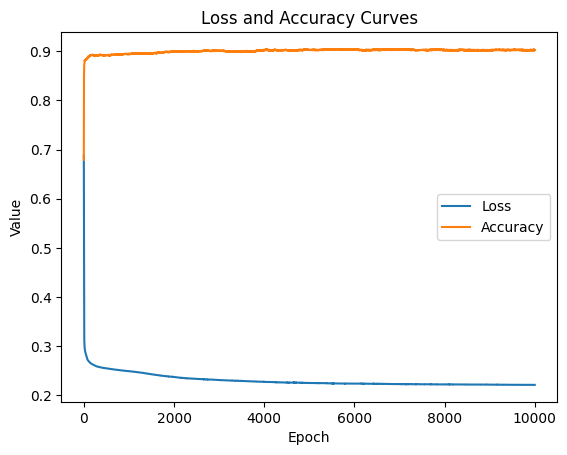

In [ ]:
# Create and train the MLP using the hyperparameters found, using early stopping with patience of 20 iterations
mlp = MLPClassifier(hidden_layer_sizes=best_parameters['hidden_layer_sizes'], max_iter=10000, alpha=best_parameters['alpha'],learning_rate_init=best_parameters['learning_rate_init'], n_iter_no_change=20, random_state=42)

# Train the MLP and collect the loss curve and accuracy on the test set
loss_curve = []
accuracy_curve = []
best_accuracy = 0.0
best_checkpoint = None
patience_count = 0  # Counter to track the number of epochs without improvement

for i in range(mlp.max_iter):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate and append the loss value
    loss_curve.append(mlp.loss_)

    # Calculate and append the accuracy on the test set
    predictions = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracy_curve.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_checkpoint = pickle.dumps(mlp)  # Serialize the MLP object
        patience_count = 0  # Reset the patience counter
    else:
        patience_count += 1
        if patience_count >= mlp.n_iter_no_change:
            print("Early stopping triggered. No improvement for", patience_count, "epochs.")
            break
    
    # For printing progress
    if (i + 1) % 1000 == 0:
        print(f"Epoch {i + 1}/{mlp.max_iter}, Loss: {mlp.loss_}, Accuracy: {accuracy}")

# Save the best MLP checkpoint
if best_checkpoint is not None:
    checkpoint_file = "mlp_best_checkpoint.pkl"
    with open(checkpoint_file, 'wb') as f:
        f.write(best_checkpoint)

# Deserialize the best MLP checkpoint
if best_checkpoint is not None:
    best_checkpoint = pickle.loads(best_checkpoint)

# Calculate and print the best accuracy
best_predictions = best_checkpoint.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
print("Best Accuracy:", best_accuracy)

# Plot the loss curve and accuracy curve
plt.plot(loss_curve, label='Loss')
plt.plot(accuracy_curve, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and Accuracy Curves')
plt.legend()
plt.show()